In [167]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
df_reestr_file_path = 'data/reestr-2.csv'

In [169]:
df_reestr = pd.read_csv(df_reestr_file_path)

In [170]:
df_reestr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_Reestr        532 non-null    int64  
 1   data             532 non-null    object 
 2   zamovnyk         532 non-null    object 
 3   misto            532 non-null    object 
 4   vulytsia         532 non-null    object 
 5   budynok          503 non-null    object 
 6   kvartyra         294 non-null    object 
 7   IPN              531 non-null    object 
 8   dohovir          528 non-null    object 
 9   ID               532 non-null    int64  
 10  bydzh_proekt     483 non-null    float64
 11  oplata           532 non-null    float64
 12  zarpl_proektant  532 non-null    float64
 13  zarpl_gip        532 non-null    float64
 14  proektant        532 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 62.5+ KB


In [171]:
df_reestr.head()

,Id_Reestr,data,zamovnyk,misto,vulytsia,budynok,kvartyra,IPN,dohovir,ID,bydzh_proekt,oplata,zarpl_proektant,zarpl_gip,proektant
0,6,2023-06-20,Ковальчук Любомир Юрійович,с. Чагор,Сагайдачного,81,0,3145424918,ДУ-1/03A580-4467-20,60300,201773.000,4473.800,865.200,207.200,Цурик Оксана Дмитрівна
1,7,2023-06-10,Дудка Олег Володимирович,с. Коровія,Головна,62-В,0,2333110011,02A580-5630-21,50300,212106.000,0.000,624.000,150.000,Сидорович Людмила Петрівна
2,8,2023-06-10,Дудка Олег Володимирович,с. Коровія,Головна,62-В,0,2333110011,29A580-3741-22,30002,22557.000,3345.560,689.300,165.800,Сидорович Людмила Петрівна
3,9,2023-06-10,Гнатюк Ілля Васильович,с. Великий Кучурів,Б.Хмельницького,15-Г,0,3338316434,02A580-1000-22,50300,22203.000,0.000,624.000,150.000,Синицький Олександр Віталійович
4,16,2023-06-10,Олар Юрій Васильович,смт Глибока,пров. Степовий,46-А,0,3155523275,29A580-14218-22,30002,221854.000,2804.060,580.800,138.800,Цурик Оксана Дмитрівна


In [172]:
df_reestr = df_reestr.drop(columns=['Id_Reestr', 'data', 'zamovnyk', 'IPN', 'dohovir', 'bydzh_proekt', 'proektant'])

In [173]:
df_reestr.head(20)

,misto,vulytsia,budynok,kvartyra,ID,oplata,zarpl_proektant,zarpl_gip
0,с. Чагор,Сагайдачного,81,0,60300,4473.800,865.200,207.200
1,с. Коровія,Головна,62-В,0,50300,0.000,624.000,150.000
2,с. Коровія,Головна,62-В,0,30002,3345.560,689.300,165.800
3,с. Великий Кучурів,Б.Хмельницького,15-Г,0,50300,0.000,624.000,150.000
4,смт Глибока,пров. Степовий,46-А,0,30002,2804.060,580.800,138.800
5,Чернівці,Вокзальна,29,62,20002,3685.960,766.000,183.000
6,Чернівці,пров. 2-й Луковецький,3-А,0,60300,15582.740,3046.500,731.000
7,Чернівці,пров. 2-й Луковецький,3-А,0,30002,3345.560,689.300,165.800
8,Чернівці,Сторожинецька,113-115,0,20002,8113.580,2119.500,509.000
9,Чернівці,Коломийська,2-Е,0,60300,16525.330,4230.500,1016.000


In [174]:
df_reestr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   misto            532 non-null    object 
 1   vulytsia         532 non-null    object 
 2   budynok          503 non-null    object 
 3   kvartyra         294 non-null    object 
 4   ID               532 non-null    int64  
 5   oplata           532 non-null    float64
 6   zarpl_proektant  532 non-null    float64
 7   zarpl_gip        532 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 33.4+ KB


In [175]:
df_reestr['misto'].unique()

array(['с. Чагор', 'с. Коровія', 'с. Великий Кучурів', 'смт Глибока',
       'Чернівці', 'с. Біла', "с. Кам'яна", 'c. Годилів',
       'с.Горішні Шерівці', 'с. Рашків', 'м. Сторожинець', 'Чагор',
       'с.Коровія', 'с.Глибочок', 'с.Чагор', 'м. Чернівці',
       'с. Топорівці', "с.Кам'яна", 'с.Годилів', 'Великий Кучурів',
       'Глибока', 'с. Годилів', 'с. Заволока', 'Годилів', 'Сторожинець',
       'Борівці', 'Кіцмань', 'Ошихліби', 'Южинець', 'с.В.Кучурів',
       'Магала', 'Коровія', 'м.Чернівці', 'с.\xa0Чагор', 'м. Новоселиця',
       'м. Хотин', 'Новоселиця', 'с. Луковиця'], dtype=object)

In [176]:
df_reestr['misto'] = df_reestr['misto'].replace({'с.Чагор': 'с. Чагор', 'Чагор': 'с. Чагор', 'Великий Кучурів': 'с. Великий Кучурів', 'Годилів': 'c. Годилів', 'Коровія': 'с. Коровія',
                                                  'Чернівці': 'м. Чернівці', 'м.Чернівці': 'м. Чернівці', 'Новоселиця': 'м. Новоселиця', 'с.В.Кучурів': 'с. Великий Кучурів', 'Сторожинець': 'м. Сторожинець',
                                                    'с.\xa0Чагор': 'с. Чагор', 'с.Коровія': 'с. Коровія', 'с.Горішні Шерівці': 'с. Горішні Шерівці', 'с.Глибочок': 'с. Глибочок',
                                                      'с.Кам\'яна': 'с. Кам\'яна', 'Борівці': 'c. Борівці', 'Кіцмань': 'м. Кіцмань', 'с.Годилів':'с. Годилів', 'Глибока': 'смт Глибока', 'Ошихліби': 'с. Ошихліби',
                                                        'Южинець': 'с. Южинець', 'Магала': 'с. Магала', 'c. Годилів': 'с. Годилів'})

In [177]:
df_reestr['misto'].unique()

array(['с. Чагор', 'с. Коровія', 'с. Великий Кучурів', 'смт Глибока',
       'м. Чернівці', 'с. Біла', "с. Кам'яна", 'с. Годилів',
       'с. Горішні Шерівці', 'с. Рашків', 'м. Сторожинець', 'с. Глибочок',
       'с. Топорівці', 'с. Заволока', 'c. Годилів', 'c. Борівці',
       'м. Кіцмань', 'с. Ошихліби', 'с. Южинець', 'с. Магала',
       'м. Новоселиця', 'м. Хотин', 'с. Луковиця'], dtype=object)

In [178]:
df_reestr['misto'] = df_reestr['misto'].str.replace('c', 'с')

In [179]:
df_reestr['misto'].unique()

array(['с. Чагор', 'с. Коровія', 'с. Великий Кучурів', 'смт Глибока',
       'м. Чернівці', 'с. Біла', "с. Кам'яна", 'с. Годилів',
       'с. Горішні Шерівці', 'с. Рашків', 'м. Сторожинець', 'с. Глибочок',
       'с. Топорівці', 'с. Заволока', 'с. Борівці', 'м. Кіцмань',
       'с. Ошихліби', 'с. Южинець', 'с. Магала', 'м. Новоселиця',
       'м. Хотин', 'с. Луковиця'], dtype=object)

## Feature engineering

In [180]:
df_reestr['kvartyra'] = pd.to_numeric(df_reestr['kvartyra'], errors='coerce')
df_reestr['is_house'] = np.where(df_reestr['kvartyra'] == 0, 1, 0)

In [181]:
conditions = [df_reestr['misto'].str.contains('смт'),
              df_reestr['misto'].str.contains('м.'),
              df_reestr['misto'].str.contains('с.')]
values = [1, 2, 0]

df_reestr['location_type'] = np.select(conditions, values, default=-1)

In [182]:
df_reestr = df_reestr.drop(columns=['misto', 'vulytsia', 'budynok', 'kvartyra'])
df_reestr = df_reestr[['is_house', 'location_type', 'ID', 'oplata', 'zarpl_proektant', 'zarpl_gip']]

In [183]:
df_reestr.head(10)

,is_house,location_type,ID,oplata,zarpl_proektant,zarpl_gip
0,1,0,60300,4473.800,865.200,207.200
1,1,0,50300,0.000,624.000,150.000
2,1,0,30002,3345.560,689.300,165.800
3,1,0,50300,0.000,624.000,150.000
4,1,1,30002,2804.060,580.800,138.800
5,0,2,20002,3685.960,766.000,183.000
6,1,2,60300,15582.740,3046.500,731.000
7,1,2,30002,3345.560,689.300,165.800
8,1,2,20002,8113.580,2119.500,509.000
9,1,2,60300,16525.330,4230.500,1016.000


In [184]:
average_payment = df_reestr.groupby('ID')['oplata'].mean()

In [185]:
average_payment

ID
20002   7603.766
30002   9805.197
50300      0.000
60300   4866.227
Name: oplata, dtype: float64

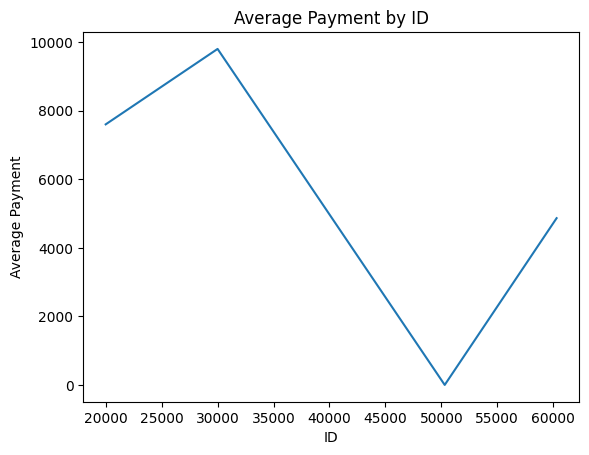

In [186]:
plt.plot(average_payment.index, average_payment.values)
plt.xlabel('ID')
plt.ylabel('Average Payment')
plt.title('Average Payment by ID')
plt.show()

In [187]:
df_reestr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_house         532 non-null    int32  
 1   location_type    532 non-null    int32  
 2   ID               532 non-null    int64  
 3   oplata           532 non-null    float64
 4   zarpl_proektant  532 non-null    float64
 5   zarpl_gip        532 non-null    float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 20.9 KB


In [188]:
df_reestr.describe()

,is_house,location_type,ID,oplata,zarpl_proektant,zarpl_gip
count,532.000,532.000,532.000,532.000,532.000,532.000
mean,0.158,1.216,37661.459,7210.800,1804.304,435.305
std,0.365,0.974,15069.167,17090.137,3556.671,873.156
min,0.000,0.000,20002.000,0.000,0.000,0.000
25%,0.000,0.000,30002.000,3.000,525.300,125.800
50%,0.000,2.000,30002.000,2806.125,689.700,165.800
75%,0.000,2.000,50300.000,3685.960,884.000,212.000
max,1.000,2.000,60300.000,150000.000,34572.000,6751.000


In [189]:
# df_reestr = df_reestr[df_reestr['oplata'] > 20]
# df_reestr = df_reestr[df_reestr['zarpl_proektant'] != 0]
# df_reestr = df_reestr[df_reestr['zarpl_gip'] != 0]

In [190]:
df_reestr.describe()

,is_house,location_type,ID,oplata,zarpl_proektant,zarpl_gip
count,532.000,532.000,532.000,532.000,532.000,532.000
mean,0.158,1.216,37661.459,7210.800,1804.304,435.305
std,0.365,0.974,15069.167,17090.137,3556.671,873.156
min,0.000,0.000,20002.000,0.000,0.000,0.000
25%,0.000,0.000,30002.000,3.000,525.300,125.800
50%,0.000,2.000,30002.000,2806.125,689.700,165.800
75%,0.000,2.000,50300.000,3685.960,884.000,212.000
max,1.000,2.000,60300.000,150000.000,34572.000,6751.000


In [191]:
df_reestr = df_reestr[df_reestr['ID'] != 50300]

In [192]:
df_reestr['ID'] = df_reestr['ID'].astype(str)

In [193]:
from sklearn.preprocessing  import LabelEncoder

predefined_encodings = ['20002', '30002', '60300']
label_encoder = LabelEncoder()
label_encoder.fit(predefined_encodings)
df_reestr['ID'] = label_encoder.transform(df_reestr['ID'])

In [194]:
df_reestr.head()

,is_house,location_type,ID,oplata,zarpl_proektant,zarpl_gip
0,1,0,2,4473.800,865.200,207.200
2,1,0,1,3345.560,689.300,165.800
4,1,1,1,2804.060,580.800,138.800
5,0,2,0,3685.960,766.000,183.000
6,1,2,2,15582.740,3046.500,731.000


In [195]:
y = df_reestr['oplata']
X = df_reestr.drop(['oplata', 'zarpl_proektant', 'zarpl_gip'], axis=1)

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd

models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso Regression': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 200, 300]}),
    'Gradient Boosting': (GradientBoostingRegressor(), {'n_estimators': [100, 200, 300]}),
    'Support Vector Regression': (SVR(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
    'Multi-Layer Perceptron': (MLPRegressor(), {'hidden_layer_sizes': [(100,), (50, 50)]}),
    'Gaussian Processes': (GaussianProcessRegressor(), {}),
    'LightGBM': (LGBMRegressor(), {'n_estimators': [100, 200, 300, 500], 'learning_rate': [0.1, 0.05, 0.01]})
}

In [198]:
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=2)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'Best Model': best_model, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['Best Model'].get_params()}")
    print(f"MSE: {result['MSE']}")
    print(f"RMSE: {result['RMSE']}")
    print(f"R2 Score: {result['R2']}")
    print("----------")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total tim

In [199]:
for model_name, result in results.items():
    best_model = result['Best Model']
    file_name = f"{model_name}_best_model.pkl"  # Define the file name for each model
    joblib.dump(best_model, file_name)

In [200]:
model = joblib.load("LightGBM_best_model.pkl")